In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 50,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-0.1, 0.1],
    c1 = 2,
    c2 = 2,
    w = 1.2,
    w_decay = 1,
    scale_hyperparameter = False,
    regularizer = l2_regularizer,
    mask = True))

see one see two 2 2


In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy'])

building layer 1 with 5
24
building layer 2 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\AI-lab\\github_repo\\neural-network\\', 'dataset')
GROUP = 4
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 200
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [8]:
# learning phase
breakpoint = 10
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)

Checkpoint 10, Accuracy: 0.8209876543209876, Loss: 0.6287345886230469
Checkpoint 20, Accuracy: 0.845679012345679, Loss: 0.6590424996835215
Checkpoint 30, Accuracy: 0.8641975308641975, Loss: 0.6209610126636647
Checkpoint 40, Accuracy: 0.8641975308641975, Loss: 0.5940722712764034
Checkpoint 50, Accuracy: 0.8518518518518519, Loss: 0.5817162195841471
Checkpoint 60, Accuracy: 0.8703703703703703, Loss: 0.5762756135728624
Checkpoint 70, Accuracy: 0.8641975308641975, Loss: 0.5632961061265733
Checkpoint 80, Accuracy: 0.8827160493827161, Loss: 0.5263150179827655
Checkpoint 90, Accuracy: 0.8888888888888888, Loss: 0.45229480884693285
Checkpoint 100, Accuracy: 0.8950617283950617, Loss: 0.43089594664397063
Checkpoint 110, Accuracy: 0.8950617283950617, Loss: 0.3885616726345486
Checkpoint 120, Accuracy: 0.9012345679012346, Loss: 0.41086034421567563
Checkpoint 130, Accuracy: 0.8950617283950617, Loss: 0.4101367879796911
Checkpoint 140, Accuracy: 0.8950617283950617, Loss: 0.4101367879796911
Checkpoint 15

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [10]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [0.79691374 0.11068802 0.09239826]
[1. 0. 0.] <-> [0.82652223 0.07438948 0.09908831]
[0. 0. 1.] <-> [0.69836414 0.02080326 0.28083262]
[1. 0. 0.] <-> [0.8282776  0.06526563 0.10645677]
[1. 0. 0.] <-> [0.8732793  0.07043902 0.05628172]
[1. 0. 0.] <-> [0.78720254 0.13177231 0.08102512]
[1. 0. 0.] <-> [0.8550002  0.03859883 0.10640101]
[0. 0. 1.] <-> [0.88039005 0.02045041 0.09915958]
[1. 0. 0.] <-> [0.7538693  0.17517097 0.07095978]
[1. 0. 0.] <-> [0.85106146 0.09023005 0.05870848]
[0. 0. 1.] <-> [0.31128728 0.03450478 0.654208  ]
[0. 0. 1.] <-> [0.48681125 0.03214042 0.48104826]
[1. 0. 0.] <-> [0.757753   0.19706185 0.04518509]
[1. 0. 0.] <-> [0.85766983 0.05281577 0.08951443]
[1. 0. 0.] <-> [0.7359608  0.1927269  0.07131239]
[0. 1. 0.] <-> [0.164323   0.8167172  0.01895973]
[1. 0. 0.] <-> [0.8693799  0.05850207 0.07211807]
[0. 1. 0.] <-> [0.43131715 0.53049105 0.03819182]
[1. 0. 0.] <-> [0.82480174 0.10193862 0.07325964]
[1. 0. 0.] <-> [0.8548722  0.03636135 0.10876647]


In [11]:
train_acc = [h['accuracy'] for h in history]
train_mse = [h['mean_square_error'] for h in history]
train_cce = [h['categorical_crossentropy'] for h in history]

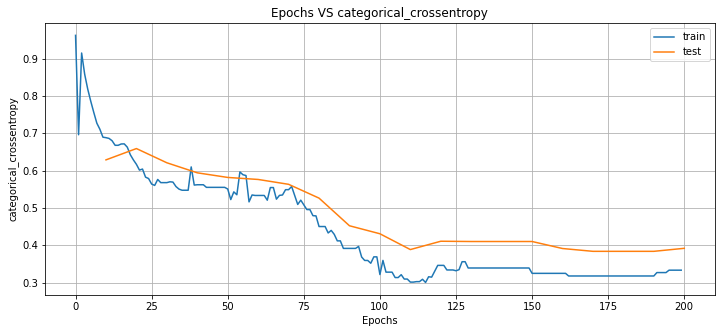

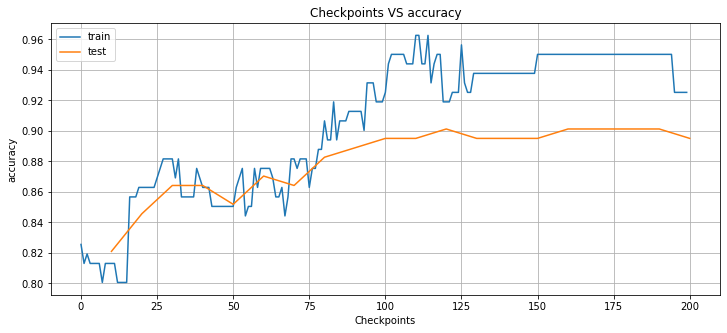

In [12]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_cce, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_acc, acc], x_label = 'Checkpoints', \
    y_label = 'accuracy', legend=['train', 'test'])

In [13]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.8209876543209876, 'mean_square_error': 0.36888461764626784, 'categorical_crossentropy': 0.6287345886230469, 'essential_metrics': {0: {'tp_hit': 76, 'fp_hit': 27, 'tn_hit': 3, 'fn_hit': 2}, 1: {'tp_hit': 3, 'fp_hit': 2, 'tn_hit': 90, 'fn_hit': 13}, 2: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 94, 'fn_hit': 14}}, 'checkpoint': 10} 


{'accuracy': 0.845679012345679, 'mean_square_error': 0.3701692943721434, 'categorical_crossentropy': 0.6590424996835215, 'essential_metrics': {0: {'tp_hit': 77, 'fp_hit': 24, 'tn_hit': 6, 'fn_hit': 1}, 1: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 16}, 2: {'tp_hit': 6, 'fp_hit': 1, 'tn_hit': 93, 'fn_hit': 8}}, 'checkpoint': 20} 


{'accuracy': 0.8641975308641975, 'mean_square_error': 0.35302658092713496, 'categorical_crossentropy': 0.6209610126636647, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 22, 'tn_hit': 8, 'fn_hit': 0}, 1: {'tp_hit': 2, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 14}, 2: {'tp_hit': 6, 'fp_hit': 0, 'tn_hit': 94, 'fn_hit'

In [14]:
print(model)

Layer 1
Neuron 0: weights:
[-0.28772184  0.70415705 -0.06230307 -0.57818276 -0.9139923 ]
 bias: 0.46622395515441895

Neuron 1: weights:
[ 0.70063    -0.8818381  -0.8309513  -0.09594318  0.40758651]
 bias: 0.29688072204589844

Neuron 2: weights:
[ 0.11150011 -0.40897524 -0.855548   -0.9539093  -0.867038  ]
 bias: 0.033246204257011414

Neuron 3: weights:
[-0.40802243  1.1231589   0.6985413   0.21728675 -0.04791775]
 bias: -0.3890864849090576

$
Layer 2
Neuron 0: weights:
[ 0.93183565  0.4714424   1.4855928  -0.49860504]
 bias: -0.10847228765487671

Neuron 1: weights:
[ 0.5703379  -1.6758207  -0.65817535  1.533124  ]
 bias: -0.07445540279150009

Neuron 2: weights:
[-1.3264085   1.2025331  -0.73459727 -0.7262459 ]
 bias: 0.19362996518611908

$

